# Shut Up and Take My Money: Анализ рынка общественного питания Москвы

- Автор: Гончарова Кристина
- Дата: 02.06.2025

### Цель проекта

Инвестиционный фонд Shut Up and Take My Money планирует открыть заведение общественного питания в Москве, но еще не определился с концепцией, локацией и ценовой политикой. Цель проекта — провести комплексный анализ рынка общепита Москвы на основе данных Яндекс Карт и Яндекс Бизнеса (лето 2022 года), чтобы выявить наиболее перспективные направления для инвестиций.

### Задачи проекта

1. Определение количества объектов общественного питания в каждой категории
2. Исследование распределения количества заведений по административным районам Москвы, а также отдельно распределения заведений каждой категории в Центральном административном округе Москвы
3. Исследование соотношения сетевых и не сетевых заведений в целом по всем данным и в разрезе категорий заведения
4. Исследование количества посадочных мест в заведениях. Определение для каждой категории заведения наиболее типичного для него количество посадочных мест
5. Исследование рейтинга заведений и распределения средних рейтингов по категориям заведений
6. Исследование корреляции рейтинга заведений с другими данными (категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным). Нахождение самой сильной связи и ее проверка
7. Определение топ-15 популярных сетей в Москве. Исследование их значений среднего рейтинга и категорий
8. Исследование вариации среднего чека заведения в зависимости от района Москвы. Анализ цен в Центральном административном округе и других. Изучение влияния удаленности от центра на цены в заведениях


### Описание данных

Файл `rest_info.csv` содержит информацию о заведениях общественного питания:

`name` — название заведения

`address` — адрес заведения

`district` — административный район

`category` — категория заведения

`hours` — график работы

`rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах

`chain` —  сетевое (1) или нет (0)

`seats` — количество посадочных мест

Файл `rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:

`price` — ценовая категория

`avg_bill` — строка со средней стоимостью заказа в виде диапазона

`middle_avg_bill` — число с оценкой среднего чека (указывается только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»)

*Если в строке указан ценовой диапазон из двух значений, в столбец войдет медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдет это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдет.*

`middle_coffee_cup` — число с оценкой цены одной чашки капучино (указывается только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»)

*Если в строке указан ценовой диапазон из двух значений, в столбец войдет медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдет это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдет.*

### Содержимое проекта

- [1. Загрузка данных и знакомство с ними](#1.-Загрузка-данных-и-знакомство-с-ними)
- [2. Предобработка данных](#2.-Предобработка-данных)
- [3. Исследовательский анализ данных](#3.-Исследовательский-анализ-данных)
- [4. Итоговый вывод и рекомендации](#4.-Итоговый-вывод-и-рекомендации)

---

## 1. Загрузка данных и знакомство с ними

Начнем с загрузки библиотек и датасетов `rest_info.csv` и `rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `info_df` и `price_df`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчета коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Значения в столбцах соответствуют своему описанию.
- Значения в столбцах `id`, `name`, `category`, `address`, `district`, `hours` представлены подходящим строковым типом.
- Значения в столбце `rating` хранятся в типе данных `float64` - размерность этих данных можно оптимизировать.
- Значения в столбце `chain` представлены `int64`, но содержат только 1 или 0 - размерность этих данных можно оптимизировать.
- Значения в столбце `seats` представлены вещественным типом - преобразуем в целочисленный тип.
- Пропуски содержатся в двух столбцах `hours`, `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Столбец с названиями заведений нормализуем.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [5]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `price_df.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Значения в столбцах соответствуют описанию.
- Типы данных соответствуют содержимому.
- Числовые типы данных понизим в разрядности.
- Пропуски содержатся во всех столбцах, кроме `id`. Также следует проверить в столбцах значения-индикаторы, которые могут говорить об отсутствии данных.

Первичное знакомство показывает, что данные соответствуют описанию, но нуждаются в дополнительной обработке для решения поставленных задач.

---

### Подготовка единого датафрейма

Для проведения дальнейшего анализа нам понадобится объединить наши датафреймы

In [7]:
# Присоединим к датафрейму info_df данные о стоимости price_df
merged_df = info_df.merge(price_df, on='id', how='left')

In [8]:
merged_df

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


In [9]:
# Cоздаем копию датасета до преобразования для возможности проверить сделанные изменения после предобработки
temp = merged_df.copy() 
len(temp)

8406

## 2. Предобработка данных

Оптимизируем типы данных

In [10]:
# Приводим данные столбца chain к целочисленному типу с пониженной размерностью
merged_df['chain'] = pd.to_numeric(merged_df['chain'], downcast='integer')

In [11]:
# Приводим данные столбца seats к целочисленному типу с сохранением NaN
merged_df['seats'] = merged_df['seats'].astype(pd.Int16Dtype())

In [12]:
# Понижаем разрядность числовых данных для столбцов rating, middle_avg_bill, middle_coffee_cup
for column in ['rating','middle_avg_bill','middle_coffee_cup']:
    merged_df[column] = pd.to_numeric(merged_df[column], downcast='float')

In [13]:
# Проверяем типы данных в датафрейме merged_df с помощью атрибута dtypes
merged_df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                  Int16
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object

Типы данных успешно оптимизированы.

Нормализуем назания заведений и адреса

In [14]:
# Приводим все названия и адреса к единому стилю написания, убираем лишние пробелы
merged_df['name'] = merged_df['name'].str.capitalize().str.strip().str.replace(r' +', ' ', regex=True)
merged_df['address'] = merged_df['address'].str.lower().str.strip().str.replace(r' +', ' ', regex=True)

In [15]:
merged_df

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,Wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,NaN,NaN,NaN,NaN


Названия и адреса успешно нормализованы.

Проверим наличие пропусков в датасете `merged_df`

При первичном анализе мы обнаружили пропуски в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Посчитаем абсолютное и относительное количество пропусков в этих столбцах.

In [16]:
# Подсчитываем количество и долю строк с пропусками
merged_df.isna().agg(['sum', 'mean']).T.rename(columns={'sum': 'Количество пропусков', 'mean': 'Доля пропусков'}).style.format({'Количество пропусков': '{:.0f}', 'Доля пропусков': '{:.4}'})

,Количество пропусков,Доля пропусков
id,0,0.0
name,0,0.0
category,0,0.0
address,0,0.0
district,0,0.0
hours,536,0.06376
rating,0,0.0
chain,0,0.0
seats,3611,0.4296
price,5091,0.6056


В столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` датафрейма `merged_df` пропущено 536, 3611, 5091, 4590, 5257, 7871 строка данных соответственно, что составляет от 6 до 94% общего числа. Количество пропусков во всех указанных столбцах достаточно большое, чтобы их просто удалить.

Можно предположить, что пропуски в столбце `seats` означают:
- нет данных (информация не была указана в исходных данных, например, на сайте, в API или базе данных)
- неприменимо (например, заведение без посадочных мест)
- ошибка сбора данных (ошибка при парсинге)

NaN в столбце `hours` могли возникнуть по аналогичным причинам отсутствия данных в источнике или ошибках при их сборе.

Большое число пропусков в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` прежде всего обусловлено принципом объединения датафреймов. Число строк датафрейма `info_df` значительно больше числа строк `price_df`. Необходимо также помнить, что эти столбцы зависимы, столбец `avg_bill` определяет остальные признаки, и тут прежде всего интересна причина отсутствия данных в нем. Вероятно, пропуски в `avg_bill` возникли также из-за ошибок парсинга или отсутствием данных в источнике. 

Попробуем установить причину пропусков в столбцах `hours`, `seats`, проанализируем возможные взаимосвязи пропусков с другими данными. Для этого добавим новые столбцы-признаки `is_seats`, который укажет на наличие пропуска в столбце `seats`, и `is_hours` для индикации пропусков в столбце `hours`.

In [17]:
# Создаем столбец is_seats
merged_df['is_seats'] = merged_df['seats'].notna().astype('int8')

In [18]:
# Создаем столбец is_hours
merged_df['is_hours'] = merged_df['hours'].notna().astype('int8')

После того как столбцы-признаки `is_seats`, `is_hours` были создан, можно посчитать распределение пропусков в столбцах `seats`, `hours` в зависимости от разных признаков.

In [19]:
for nm in 'category', 'district', 'chain', 'is_hours':
    print (f'Доля заполненных строк столбца seats в разрезе признака {nm}')
    print(merged_df.groupby(nm)['is_seats'].mean().sort_values(ascending=False), '\n')

Доля заполненных строк столбца seats в разрезе признака category
category
пиццерия           0.674566
ресторан           0.621635
бар,паб            0.611765
быстрое питание    0.578773
булочная           0.578125
кофейня            0.531493
столовая           0.520635
кафе               0.512195
Name: is_seats, dtype: float64 

Доля заполненных строк столбца seats в разрезе признака district
district
Северо-Западный административный округ     0.650367
Северный административный округ            0.650000
Южный административный округ               0.635650
Юго-Западный административный округ        0.631876
Северо-Восточный административный округ    0.566779
Западный административный округ            0.561692
Центральный административный округ         0.525424
Восточный административный округ           0.523810
Юго-Восточный административный округ       0.490196
Name: is_seats, dtype: float64 

Доля заполненных строк столбца seats в разрезе признака chain
chain
1    0.601248
0    0.55143

In [20]:
for nm in 'category', 'district', 'chain', 'is_seats':
    print (f'Доля заполненных строк столбца hours в разрезе признака {nm}')
    print(merged_df.groupby(nm)['is_hours'].mean().sort_values(ascending=False), '\n')

Доля заполненных строк столбца hours в разрезе признака category
category
пиццерия           0.992101
кофейня            0.989384
бар,паб            0.976471
булочная           0.972656
столовая           0.971429
ресторан           0.963779
быстрое питание    0.945274
кафе               0.842304
Name: is_hours, dtype: float64 

Доля заполненных строк столбца hours в разрезе признака district
district
Центральный административный округ         0.986173
Северный административный округ            0.940000
Северо-Восточный административный округ    0.931538
Южный административный округ               0.927130
Западный административный округ            0.922444
Юго-Западный административный округ        0.916784
Восточный административный округ           0.906015
Северо-Западный административный округ     0.902200
Юго-Восточный административный округ       0.880952
Name: is_hours, dtype: float64 

Доля заполненных строк столбца hours в разрезе признака chain
chain
1    0.963807
0    0.91924

Явной связи появления пропусков в столбцах `seats`, `hours` от других признаков не прослеживается. Можно изучить влияние признаков `category`, `district`, `chain` на количество посадочных мест и часы работы, и заполнить пропуски по выявленным закономерностям, но для нашего исследования нет необходимости их заполнять, поэтому оставим их и учтем при дальнейшем анализе.

In [21]:
# Удаляем вспомогательные столбцы is_seats, is_hours из датафрейма, так так они нам не понадобятся для дальнейшего анализа
merged_df.drop(['is_seats', 'is_hours'], axis=1)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,Wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,NaN,NaN,NaN,NaN


Из столбцов с различной информацией о стоимости для дальнейшего анализа нам потребуется только столбец `middle_avg_bill`. Изучим подробнее пропуски в этом столбце.

In [22]:
# Сначала проверим, что в middle_avg_bill нет пропусков по причине ошибки парсинга столбца avg_bill
# Найдем строки с пропусками в middle_avg_bill, которых быть не должно по логике заполнения из столбца avg_bill
merged_df[(merged_df['avg_bill'].notna()) 
    & (merged_df['middle_avg_bill'].isna()) 
    & (~merged_df['avg_bill'].str.startswith('Цена чашки капучино', na=False)) 
    & (~merged_df['avg_bill'].str.startswith('Цена бокала пива', na=False))]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_seats,is_hours


Таких строк нет. И значит столбец `middle_avg_bill` заполнен, насколько позволяет наличие данных в `avg_bill`.

Можно предположить, что столбец `avg_bill` заполняется только для определенного вида заведения. Попробуем выявить эту зависимость.

In [23]:
# Найдем категории заведений, для которых характерно заполнение среднего счета в общем, средней цены чашки капучино или пива
for s in 'Средний счёт', 'Цена чашки капучино', 'Цена бокала пива':
    print(f"Категории заведений, заполняющих '{s}'")
    print(*merged_df[merged_df['avg_bill'].str.startswith(s, na=False)]['category'].unique(), sep='\n')

Категории заведений, заполняющих 'Средний счёт'
ресторан
кафе
пиццерия
бар,паб
быстрое питание
столовая
кофейня
булочная
Категории заведений, заполняющих 'Цена чашки капучино'
кофейня
кафе
пиццерия
бар,паб
быстрое питание
Категории заведений, заполняющих 'Цена бокала пива'
бар,паб
пиццерия


Категории пересекаются и нельзя однозначно сказать, что признак `avg_bill` заполняется в зависимости от категории заведения. Тогда просто оставим пропуски в столбце `middle_avg_bill`.

Проверим данные на наличие явных и неявных дубликатов

In [24]:
# Для начала проверим корректность написания категориальных значений в данных
# Проверяем уникальные значения в категориальных столбцах
for column in ['category', 'district', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(merged_df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]



В обозначении категорий, округов и классификации цен ошибок нет.

In [25]:
# Проверяем полные дубликаты в датафрейме merged_df
merged_df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты — значения по id заведений должны быть уникальными, то есть каждая строка в данных — уникальное заведение:

In [26]:
# Проверяем неявные дубликаты в датафрейме merged_df
merged_df.duplicated(subset='id').sum()

0

Тут тоже все хорошо — каждая строка соответствует уникальному заведению.

In [27]:
# Проверим, что под разными id не скрыты дубликаты
# И заодно удалим неинформативный столбец id
merged_df = merged_df.drop('id', axis=1)

In [28]:
merged_df

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_seats,is_hours
0,Wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN,0,1
1,Четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,1,1
2,Хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,1,1
3,Dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,1
4,Иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,Суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,NaN,NaN,NaN,NaN,1,1
8402,Миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,NaN,NaN,NaN,NaN,1,1
8403,Самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,NaN,Средний счёт:от 150 ₽,150.0,NaN,1,1
8404,Чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,NaN,NaN,NaN,NaN,1,1


In [29]:
merged_df.duplicated().sum() # Снова полных дубликатов нет

0

In [30]:
# Неявный дубликат может возникнут по причине задвоения показателей для одного и того же заведения (например, при сборе информации из разных источников) 
# Проверим датасет на такие дубликаты, считая, что заведение однозначно определяется его названием, категорией и адресом
merged_df[merged_df.duplicated(subset=['name', 'category', 'address'], keep=False)]

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_seats,is_hours
189,Кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,<NA>,NaN,NaN,NaN,NaN,0,1
215,Кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,<NA>,NaN,NaN,NaN,NaN,0,1
1430,More poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188,NaN,NaN,NaN,NaN,1,1
1511,More poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,NaN,NaN,NaN,NaN,1,1


Ресторан "More poke" и кафе "Кафе" появляются в датасете дважды с несколько разными характеристиками. Чтобы выбрать тактику работы с дубликатами для ресторана "More poke" изучим все строки в датасете, в случае с кафе "Кафе" просто удалим одну строку (отличия только в режиме работы), так как для кафе "Кафе" слишком много строк в датасете и по ним не найти закономерностей.

In [31]:
# Посмотрим на все рестораны More poke в датасете
merged_df[merged_df['name'] == 'More poke']

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_seats,is_hours
1430,More poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188,NaN,NaN,NaN,NaN,1,1
1511,More poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,NaN,NaN,NaN,NaN,1,1
6088,More poke,ресторан,"москва, духовской переулок, 19",Южный административный округ,"ежедневно, 10:00–22:00",4.4,1,<NA>,NaN,NaN,NaN,NaN,0,1


In [32]:
# Удалим дубликаты (для More poke сохраним строку chain = 1)
merged_df = merged_df.drop_duplicates(subset=['name', 'category', 'address'], keep='last') 

In [33]:
merged_df[merged_df['name'] == 'More poke'] # теперь для More poke информация не дублируется и не противоречит

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_seats,is_hours
1511,More poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,NaN,NaN,NaN,NaN,1,1
6088,More poke,ресторан,"москва, духовской переулок, 19",Южный административный округ,"ежедневно, 10:00–22:00",4.4,1,<NA>,NaN,NaN,NaN,NaN,0,1


In [34]:
# Еще раз проверим дубликаты
merged_df[merged_df.duplicated(subset=['name', 'category', 'address'], keep=False)]

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_seats,is_hours


In [35]:
# Проверим также неявные дубликаты по наименоваю и адресу
merged_df[merged_df.duplicated(subset=['name', 'address'], keep=False)]

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_seats,is_hours
2211,Раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150,NaN,NaN,NaN,NaN,1,1
2420,Раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,NaN,NaN,NaN,NaN,1,1
3091,Хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276,NaN,NaN,NaN,NaN,1,1
3109,Хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276,NaN,NaN,NaN,NaN,1,0


Обнаружено 2 дубликата. Гипотетически два заведения с одним названием, но разной категории могут существовать по одному адресу (например, ресторан на первом этаже, а на цокольном этаже бар этой же сети). Но наши данные по содержанию очень похожи, поэтому вероятнее всего это дубликаты. Оба заведения сетевые, поэтому удалим дублирующиеся строки с chain = 0.

In [36]:
# Удаляем дубликаты для Хлеб да выпечка и Раковарня клешни и хвосты
mask = (merged_df['name'] == 'Хлеб да выпечка') & (merged_df['chain'] == 0)
merged_df = merged_df[~mask]
mask = (merged_df['name'] == 'Раковарня клешни и хвосты') & (merged_df['chain'] == 0)
merged_df = merged_df[~mask]

Для дальнейшего исследования создадим столбец-индикатор `is_24_7`, разделающий заведения на работающие круглосуточно и ежедневно (1) и нет (0).

In [37]:
merged_df['is_24_7'] = merged_df['hours'].apply(lambda x: 1 if x == 'ежедневно, круглосуточно' else 0)

In [38]:
merged_df

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_seats,is_hours,is_24_7
0,Wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN,0,1,0
1,Четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,1,1,0
2,Хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,1,1,0
3,Dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,1,0
4,Иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,Суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,NaN,NaN,NaN,NaN,1,1,0
8402,Миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,NaN,NaN,NaN,NaN,1,1,0
8403,Самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,NaN,Средний счёт:от 150 ₽,150.0,NaN,1,1,1
8404,Чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,NaN,NaN,NaN,NaN,1,1,1


In [39]:
# Посмотрим на количесвто заведений, работающих 24/7
merged_df['is_24_7'].value_counts()

is_24_7
0    7672
1     730
Name: count, dtype: int64

In [40]:
# Проверим, сколько строк датасета удалено в ходе предобработки
a, b = len(temp), len(merged_df)
print(" Было строк в исходном датасете:", a,
      '\n', "Осталось строк в датасете после обработки:", b,
      '\n', "Удалено строк датасета в ходе обработки:", a-b,
      '\n', "Процент потерь:", round((a-b)/a*100, 2))

 Было строк в исходном датасете: 8406 
 Осталось строк в датасете после обработки: 8402 
 Удалено строк датасета в ходе обработки: 4 
 Процент потерь: 0.05


-----------------------
**Предобработка данных завершена**

Этапы подготовки данных к анализу:

- Оптимизация типов данных:

Приведены к оптимальным типам столбцы `chain` (int8), `seats` (Int16), `rating`(float32), `middle_avg_bill`(float32), `middle_coffee_cup`(float32), что позволило уменьшить объем используемой памяти.

- Анализ и обработка пропусков:

Обнаружены пропуски в столбцах:

`hours` – 536 (6.4%)

`seats` – 3611 (43%)

`price` – 5091 (60.6%)

`avg_bill` – 4590 (54.6%)

`middle_avg_bill` – 5257 (62.5%)

`middle_coffee_cup` – 7871 (93.6%).

Пропуски в столбцах `seats` и `hours` не имеют явной зависимости от других признаков (категории, округа, сети).

Принято решение не удалять строки с пропусками, так как их доля значительна, и они могут быть полезны для анализа других параметров.

- Объединение датасетов:

Для проведения дальнейшего исследования исходные датасеты `info_df` и `price_df` объединены в один `merged_df`.

- Обработка дубликатов:

Проверены явные и неявные дубликаты. 

Полных дубликатов не обнаружено.

Найдено и удалено 4 неявных дубликата (для заведений More poke, Кафе, Хлеб да выпечка, Раковарня клешни и хвосты).

Удален столбец `id`, так как он не несет полезной информации для анализа.

- Дополнительные преобразования:

Названия и адреса заведений нормализованы (капитализация/нижний регистр, удаление лишних пробелов).

Создан столбец `is_24_7` для индикации круглосуточных заведений.

**Итоговый объем данных:**

После обработки в датафрейме осталось 8402 строки и 15 столбцов.


## 3. Исследовательский анализ данных

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории.

In [41]:
# Получаем распределение заведений по категориям в относительных значениях
print('Распределение заведений по категориям в относительных значениях:')
merged_df['category'].value_counts(normalize=True)

Распределение заведений по категориям в относительных значениях:


category
кафе               0.282790
ресторан           0.242918
кофейня            0.168174
бар,паб            0.091050
пиццерия           0.075339
быстрое питание    0.071769
столовая           0.037491
булочная           0.030469
Name: proportion, dtype: float64

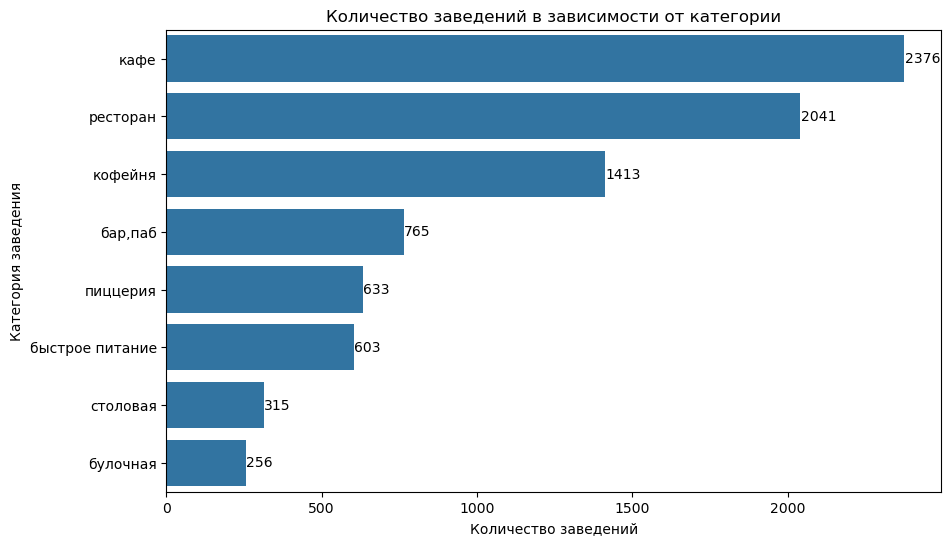

In [42]:
# Визуализируем распределение заведений по категориям в абсолютных значениях

# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(10, 6))

# Создаем порядок сортировки
category_order = merged_df['category'].value_counts(ascending=False).index

# Строим горизонтальную столбчатую диаграмму для категорий с помощью библиотеки seaborn
ax = sns.countplot(data=merged_df, y="category", order=category_order)

# Настраиваем оформление графика
# Ручное добавление подписей
for patch in ax.patches:
    width = patch.get_width()  # Получаем ширину столбца (значение count)
    y = patch.get_y() + patch.get_height() / 2  # Центрируем по высоте
    ax.text(width + 0.5, y, f'{int(width)}', va='center')  # +0.5 для отступа
plt.title("Количество заведений в зависимости от категории")
plt.xlabel("Количество заведений")
plt.ylabel("Категория заведения")

# Выводим график
plt.show()

Наиболее часто встречаемая категория заведений в Москве - **кафе**. Затем идут **рестораны** и **кофейни**. Меньше всего в Москве **булочных** (это вам не Петербург :)))

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [43]:
# Получаем распределение заведений по округам в относительных значениях
print('Распределение заведений по округам в относительных значениях:')
merged_df['district'].value_counts(normalize=True)

Распределение заведений по округам в относительных значениях:


district
Центральный административный округ         0.266841
Северный административный округ            0.106879
Южный административный округ               0.106165
Северо-Восточный административный округ    0.105927
Западный административный округ            0.101166
Восточный административный округ           0.094977
Юго-Восточный административный округ       0.084980
Юго-Западный административный округ        0.084385
Северо-Западный административный округ     0.048679
Name: proportion, dtype: float64

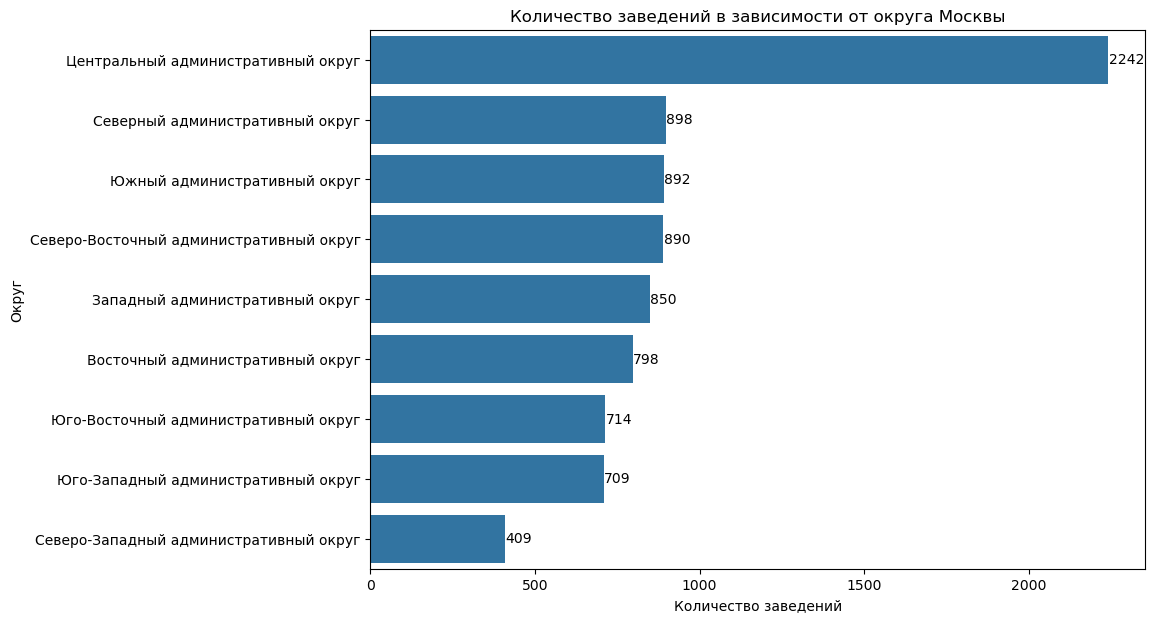

In [44]:
# Визуализируем распределение заведений по округам в абсолютных значениях

# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(10, 7))

# Создаем порядок сортировки
district_order = merged_df['district'].value_counts(ascending=False).index

# Строим горизонтальную столбчатую диаграмму для административных районов Москвы с помощью библиотеки seaborn
ax = sns.countplot(data=merged_df, y="district", order=district_order)

# Настраиваем оформление графика
# Ручное добавление подписей
for patch in ax.patches:
    width = patch.get_width()  # Получаем ширину столбца (значение count)
    y = patch.get_y() + patch.get_height() / 2  # Центрируем по высоте
    ax.text(width + 0.5, y, f'{int(width)}', va='center')  # +0.5 для отступа
plt.title("Количество заведений в зависимости от округа Москвы")
plt.xlabel("Количество заведений")
plt.ylabel("Округ")

# Выводим график
plt.show()

В распределении заведений по административным районам Москвы можно выделить абсолютного лидера - ЦАО, и округ с самым минимальным количеством заведений - СЗАО. Для остальных округов характерно более равномерное распределение.

In [45]:
# Получаем распределение заведений ЦАО по категориям в относительных значениях
print('Распределение заведений ЦАО по категориям в относительных значениях:')
merged_df[merged_df['district'] == 'Центральный административный округ']['category'].value_counts(normalize=True)

Распределение заведений ЦАО по категориям в относительных значениях:


category
ресторан           0.298840
кафе               0.206958
кофейня            0.190901
бар,паб            0.162355
пиццерия           0.050401
быстрое питание    0.038805
столовая           0.029438
булочная           0.022302
Name: proportion, dtype: float64

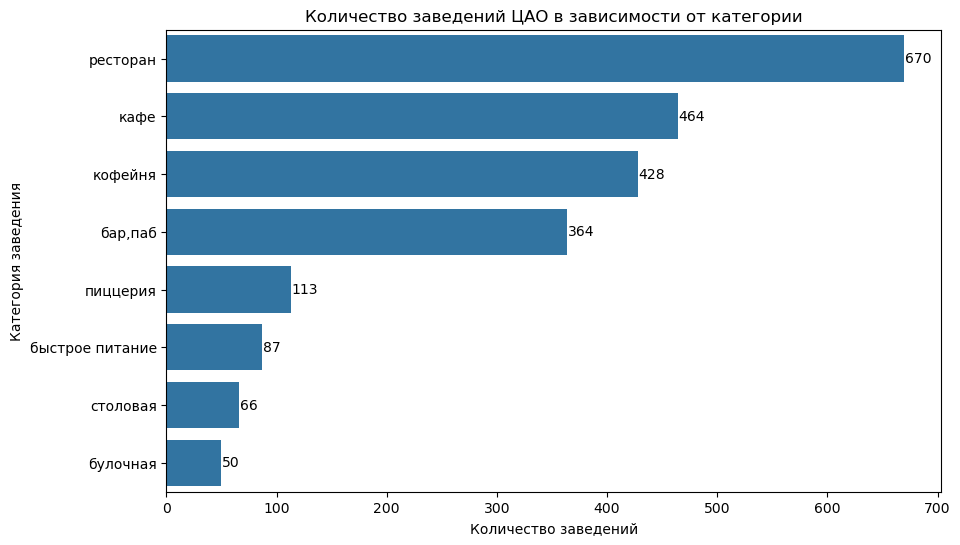

In [46]:
# Визуализируем распределение заведений ЦАО по категорям в абсолютных значениях

# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(10, 6))

# Создаем порядок сортировки
category_order = merged_df[merged_df['district'] == 'Центральный административный округ']['category'].value_counts(ascending=False).index

# Строим горизонтальную столбчатую диаграмму для категорий с помощью библиотеки seaborn
ax = sns.countplot(data=merged_df[merged_df['district'] == 'Центральный административный округ'], y="category", order=category_order)

# Настраиваем оформление графика
# Ручное добавление подписей
for patch in ax.patches:
    width = patch.get_width()  # Получаем ширину столбца (значение count)
    y = patch.get_y() + patch.get_height() / 2  # Центрируем по высоте
    ax.text(width + 0.5, y, f'{int(width)}', va='center')  # +0.5 для отступа
plt.title("Количество заведений ЦАО в зависимости от категории")
plt.xlabel("Количество заведений")
plt.ylabel("Категория заведения")

# Выводим график
plt.show()

Распределение заведений ЦАО по категориям имеет характер, похожий на общее распределение для всего города: лидеры - рестораны, кафе, кофейни; антилидер - булочные.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? 

In [47]:
# Посчитаем соотношение сетевых/не сетевых заведений города в абсолютных значениях
merged_df["chain"].value_counts()

chain
0    5197
1    3205
Name: count, dtype: int64

In [48]:
# Посчитаем соотношение сетевых/не сетевых заведений города в относительных значениях
merged_df["chain"].value_counts(normalize=True)

chain
0    0.618543
1    0.381457
Name: proportion, dtype: float64

Сетевые/не сетевые заведения в городе соотносятся, как ~38/62.

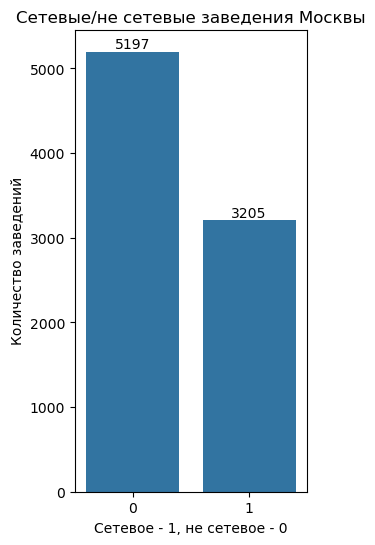

In [49]:
# Визуализируем это соотношение в абсолютных значениях

# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(3, 6))

# Строим столбчатую диаграмму для отображения числа сетевых и не сетевых заведений с помощью библиотеки seaborn
ax = sns.countplot(data=merged_df, x="chain")

# Настраиваем оформление графика
# Ручное добавление подписей
# Ручное добавление подписей столбцов
for patch in ax.patches:
    height = patch.get_height()  # Получаем высоту столбца (значение count)
    x = patch.get_x() + patch.get_width() / 2  # Центр столбца по X
    y = patch.get_y() + height  # Верхняя граница столбца
    ax.text(x, y + 0.5,  # +0.5 для небольшого отступа сверху
            f'{int(height)}', 
            ha='center',  # Горизонтальное выравнивание по центру
            va='bottom')  # Вертикальное выравнивание снизу
plt.title("Сетевые/не сетевые заведения Москвы")
plt.xlabel("Сетевое - 1, не сетевое - 0")
plt.ylabel("Количество заведений")

# Выводим график
plt.show()

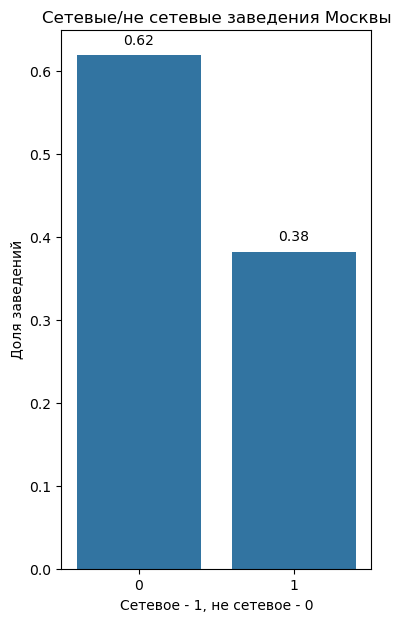

In [50]:
# Визуализируем и в относительных значениях

# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(4, 7))

value_counts = merged_df['chain'].value_counts(normalize=True).reset_index()
value_counts.columns = ['chain', 'proportion'] 

# Строим столбчатую диаграмму для отображения числа сетевых и не сетевых заведений с помощью библиотеки seaborn
ax = sns.barplot(data=value_counts, x="chain", y="proportion")

# Настраиваем оформление графика
# Ручное добавление подписей
# Ручное добавление подписей столбцов
for patch in ax.patches:
    height = patch.get_height()  # Получаем высоту столбца (значение count)
    x = patch.get_x() + patch.get_width() / 2  # Центр столбца по X
    y = patch.get_y() + height  # Верхняя граница столбца
    ax.text(x, y + 0.01,  # +0.01 для небольшого отступа сверху
            f'{height:.2f}', 
            ha='center',  # Горизонтальное выравнивание по центру
            va='bottom')  # Вертикальное выравнивание снизу
plt.title("Сетевые/не сетевые заведения Москвы")
plt.xlabel("Сетевое - 1, не сетевое - 0")
plt.ylabel("Доля заведений")

# Выводим график
plt.show()

5197 (62%) заведений Москвы сетевые, 3205 (38%) - не сетевые.

In [51]:
# Посчитаем число сетевых/не сетевых заведений города в зависимости от категории
merged_df.groupby('category')["chain"].value_counts().reset_index(name="count").sort_values(by=['category', 'chain'])

,category,chain,count
0,"бар,паб",0,596
1,"бар,паб",1,169
3,булочная,0,99
2,булочная,1,157
4,быстрое питание,0,371
5,быстрое питание,1,232
6,кафе,0,1597
7,кафе,1,779
9,кофейня,0,693
8,кофейня,1,720


In [52]:
# Посчитаем доли сетевых/не сетевых заведений города в зависимости от категории
merged_df.groupby('category')["chain"].value_counts(normalize=True).reset_index(name="count").sort_values(by=['category', 'chain'])

,category,chain,count
0,"бар,паб",0,0.779085
1,"бар,паб",1,0.220915
3,булочная,0,0.386719
2,булочная,1,0.613281
4,быстрое питание,0,0.615257
5,быстрое питание,1,0.384743
6,кафе,0,0.672138
7,кафе,1,0.327862
9,кофейня,0,0.490446
8,кофейня,1,0.509554


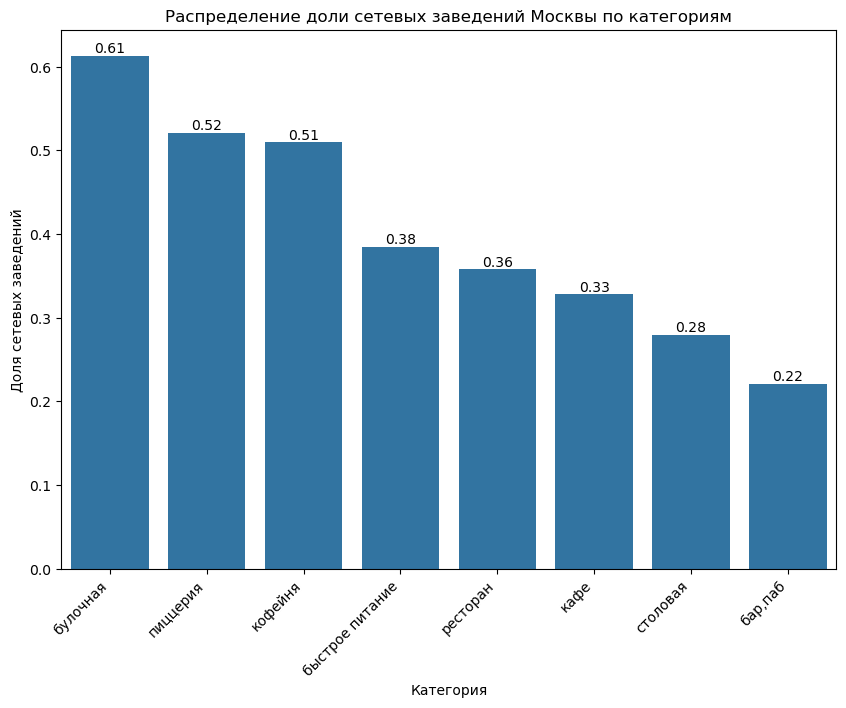

In [53]:
# Визуализируем долю сетевых заведений в каждой категории

x = merged_df.groupby('category')["chain"].value_counts(normalize=True).reset_index(name="count").sort_values('count', ascending=False)
x = x[x['chain'] == 1]

# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(10, 7))

# Строим столбчатую диаграмму для отображения числа сетевых и не сетевых заведений с помощью библиотеки seaborn
ax = sns.barplot(data=x, x="category", y="count")

# Настраиваем оформление графика
# Ручное добавление подписей столбцов
for patch in ax.patches:
    height = patch.get_height()  # Получаем высоту столбца (значение count)
    x = patch.get_x() + patch.get_width() / 2  # Центр столбца по X
    y = patch.get_y() + height  # Верхняя граница столбца
    ax.text(x, y, 
            f'{height:.2f}', 
            ha='center',  # Горизонтальное выравнивание по центру
            va='bottom')  # Вертикальное выравнивание снизу
plt.title("Распределение доли сетевых заведений Москвы по категориям")
plt.xlabel("Категория")
plt.ylabel("Доля сетевых заведений")
plt.xticks(rotation=45, ha='right') 

# Выводим график
plt.show()

В категориях **бар/паб**, **столовая**, **кафе**, **ресторан**, **быстрое питание**  преобладают **не сетевые** заведения.

В категориях **кофейня**, **пиццерия** распределение почти равномерное - 50/50.

Лишь в категории **булочная** преобладают **сетевые** заведения (порядка 60 процентов).

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест.


In [54]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца seats:')
merged_df['seats'].describe()

Статистические показатели столбца seats:


count        4792.0
mean     108.361436
std       122.84113
min             0.0
25%            40.0
50%            75.0
75%           140.0
max          1288.0
Name: seats, dtype: Float64

Среднее и медианное значение сильно разнятся, это говорит об ассиметричности распределения, среднее смещается вправо за счет наличия высоких значений в столбце. Высокое стандартное отклонение свидетельствует о широком разбросе величин, также это подтверждает разница между максимальным и минимальным значениями.

Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с посадочными местами.

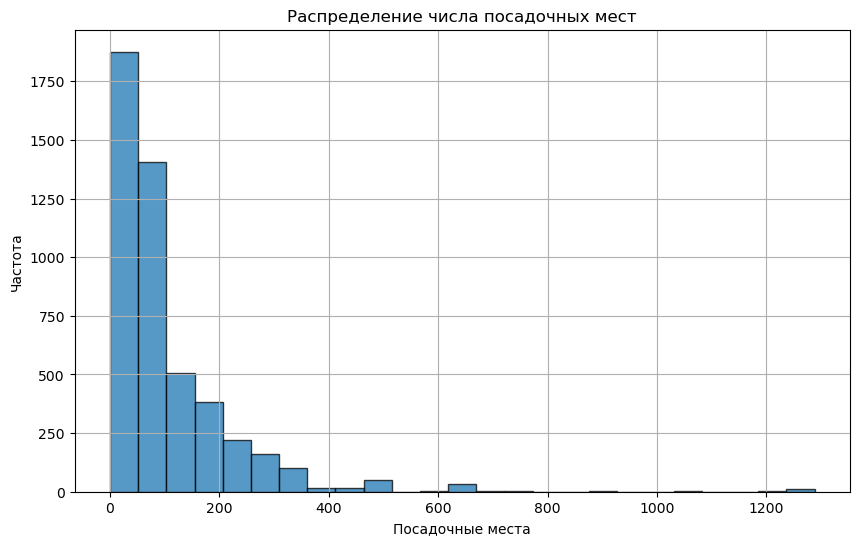

In [55]:
# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(10, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
merged_df['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0 # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение числа посадочных мест')
plt.xlabel('Посадочные места')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Очевидная правосторонняя асимметрия (большой хвост в сторону высоких значений)

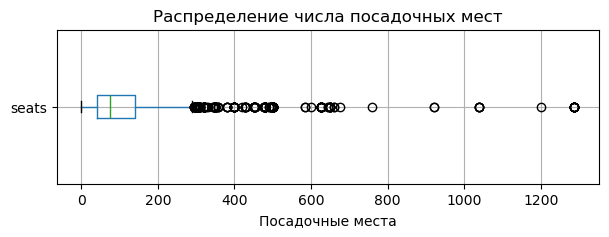

In [56]:
# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце seats
merged_df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение числа посадочных мест')
plt.xlabel('Посадочные места')

# Выводим график
plt.show()

Большая часть заведений имеет относительно небольшое количество мест (до 140). Есть редкие выбросы с очень большим числом мест (до 1288), которые и "тянут" среднее вверх. Значения, как 0, так и 1288, не выглядят аномальными, так как заведения могут быть разные - без посадочным мест вообще, либо с большим количеством (банкетные залы, заведения питания в спортивно-концертных комплексах, фуд-корты).

In [57]:
# Посчитаем для каждой категории заведений наиболее типичное для него количество посадочных мест
merged_df.groupby('category')['seats'].median().sort_values()

category
булочная           50.0
пиццерия           55.0
кафе               60.0
быстрое питание    65.0
столовая           75.5
кофейня            80.0
бар,паб            82.5
ресторан           86.0
Name: seats, dtype: Float64

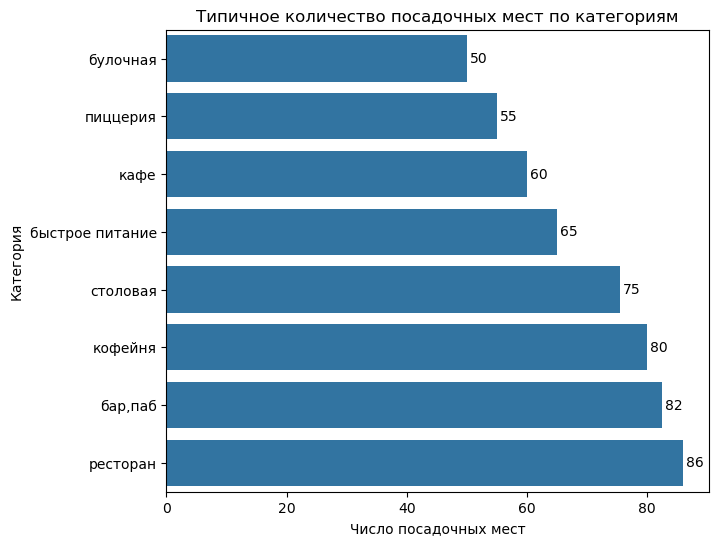

In [58]:
# Визуализируем это соотношение столбчатой диаграммой

# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(7, 6))

# Строим столбчатую диаграмму для отображения типичного числа посадочных мест в разрезе катеогрии заведения с помощью библиотеки seaborn
ax = sns.barplot(data=merged_df.groupby('category')['seats'].median().reset_index().sort_values('seats'), y='category', x='seats')

# Настраиваем оформление графика
for patch in ax.patches:
    width = patch.get_width()  # Получаем ширину столбца (значение count)
    y = patch.get_y() + patch.get_height() / 2  # Центрируем по высоте
    ax.text(width + 0.5, y, f'{int(width)}', va='center')  # +0.5 для отступа
plt.title("Типичное количество посадочных мест по категориям")
plt.xlabel("Число посадочных мест")
plt.ylabel("Категория")

# Выводим график
plt.show()

Для **ресторанов** характерно самое большое число посадочных мест. Самое маленькое - для **булочных**.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [59]:
# Изучаем статистические показатели столбца rating
print('Статистические показатели столбца rating:')
merged_df['rating'].describe()

Статистические показатели столбца rating:


count    8402.000000
mean        4.230016
std         0.470318
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Среднее значение 4.23 из максимальных 5 говорит о том, что рейтинги в целом высокие. 

Стандартное отклонение 0.47 — небольшой разброс данных вокруг среднего, большинство оценок сосредоточено в узком диапазоне.

Медиана (50%) = 4.3 > Среднего (4.23) → распределение скошено влево (левосторонняя асимметрия).
Это значит, что есть небольшой "хвост" низких оценок (1.0–4.0), но большинство значений сконцентрировано ближе к 4.0–5.0.

25-й перцентиль (4.1) и 75-й перцентиль (4.4) показывают, что 50% данных лежат в очень узком интервале 4.1–4.4.

Min = 1.0 — есть редкие крайне низкие оценки (возможно, выбросы или реально плохой опыт).

Max = 5.0 — максимальный рейтинг, но он не сильно выделяется, так как 75% данных ≤ 4.4.

Построим гистограмму распределения значений и диаграмму размаха для столбца с рейтингом.

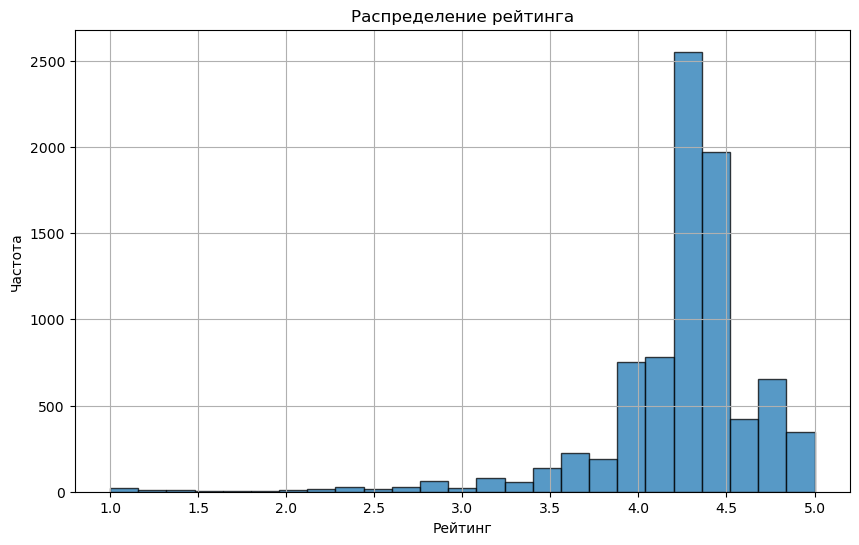

In [60]:
# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(10, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
merged_df['rating'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0 # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Гистограмма соответсвует соответствует описанию выше.

In [61]:
# Посчитаем и визуализируем средний рейтинг для каждой категории заведения
merged_df.groupby('category')['rating'].mean().round(2).sort_values()

category
быстрое питание    4.05
кафе               4.12
столовая           4.21
булочная           4.27
кофейня            4.28
ресторан           4.29
пиццерия           4.30
бар,паб            4.39
Name: rating, dtype: float32

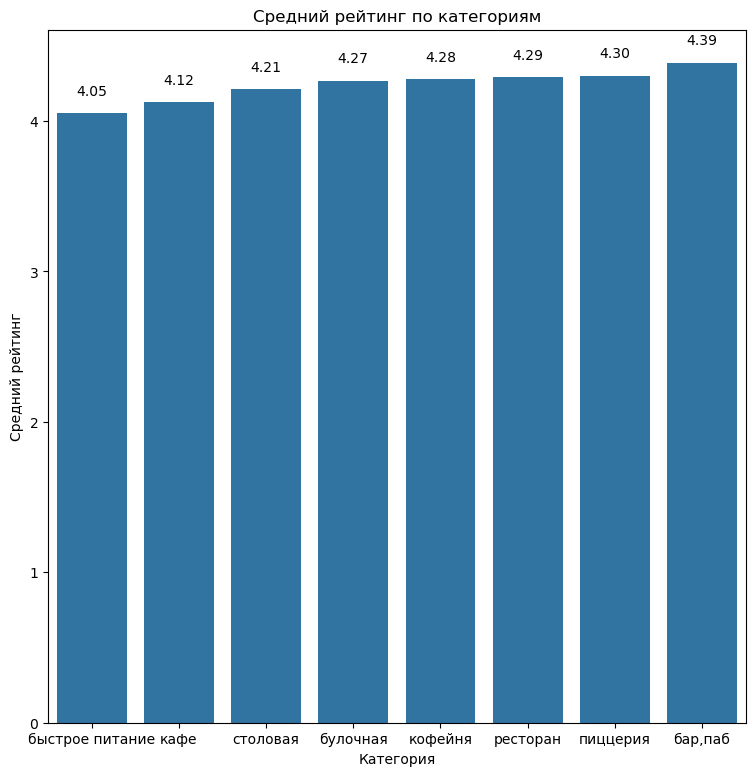

In [62]:
# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(9, 9))

# Строим столбчатую диаграмму для отображения среднего рейтинга в разрезе катеогрии заведения с помощью библиотеки seaborn
ax = sns.barplot(data=merged_df.groupby('category')['rating'].mean().reset_index().sort_values('rating'), x='category', y='rating')

# Настраиваем оформление графика
# Ручное добавление подписей столбцов
for patch in ax.patches:
    height = patch.get_height()  # Получаем высоту столбца (значение count)
    x = patch.get_x() + patch.get_width() / 2  # Центр столбца по X
    y = patch.get_y() + height  # Верхняя граница столбца
    ax.text(x, y + 0.1,  # +0.1 для небольшого отступа сверху
            f'{height:.2f}', 
            ha='center',  # Горизонтальное выравнивание по центру
            va='bottom')  # Вертикальное выравнивание снизу
plt.title("Средний рейтинг по категориям")
plt.ylabel("Средний рейтинг")
plt.xlabel("Категория")

# Выводим график
plt.show()

Мосвичи и гости столицы единогласно высоко оценивают заведения столицы любой категории. Возможно, люди не любят оставлять отрицательные отзывы. Нельзя также исключить накрутку оценок.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений. Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [63]:
# Выберем нужные столбцы
columns_for_corr = ['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']
df = merged_df[columns_for_corr].copy()

In [64]:
# Вычисляем матрицу корреляции Phi-K
corr_matrix = df.phik_matrix()

interval columns not set, guessing: ['rating', 'chain', 'seats', 'is_24_7']


In [65]:
corr_matrix

,rating,category,district,chain,seats,price,is_24_7
rating,1.000000,0.198763,0.189453,0.119212,0.000000,0.262056,0.161010
category,0.198763,1.000000,0.174517,0.265477,0.048265,0.566933,0.244814
district,0.189453,0.174517,1.000000,0.064447,0.352440,0.202787,0.076357
chain,0.119212,0.265477,0.064447,1.000000,0.057584,0.218211,0.043227
seats,0.000000,0.048265,0.352440,0.057584,1.000000,0.088146,0.043193
price,0.262056,0.566933,0.202787,0.218211,0.088146,1.000000,0.084183
is_24_7,0.161010,0.244814,0.076357,0.043227,0.043193,0.084183,1.000000


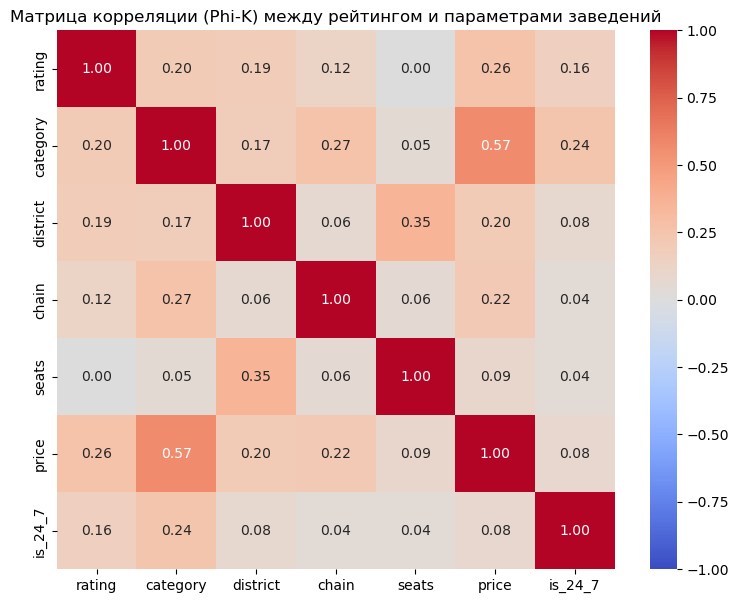

In [66]:
# Визуализируем матрицу корреляции
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Матрица корреляции (Phi-K) между рейтингом и параметрами заведений")
plt.show()

In [67]:
# Найдем самую сильную корреляцию с рейтингом (исключая корреляцию rating с самим собой)
corr_with_rating = corr_matrix['rating'].drop('rating')
strongest_corr = corr_with_rating.abs().idxmax()
strongest_corr_value = corr_with_rating[strongest_corr]

print(f"Самая сильная корреляция с рейтингом: {strongest_corr} (φk = {strongest_corr_value:.2f})")

Самая сильная корреляция с рейтингом: price (φk = 0.26)


Проверим выявленную связь

In [68]:
# Группируем данные по price и смотрим средний рейтинг
price_rating = merged_df.groupby('price')['rating'].mean().round(2).sort_values()

print("Средний рейтинг по ценовым категориям:")
print(price_rating)

Средний рейтинг по ценовым категориям:
price
низкие           4.17
средние          4.30
выше среднего    4.39
высокие          4.44
Name: rating, dtype: float32


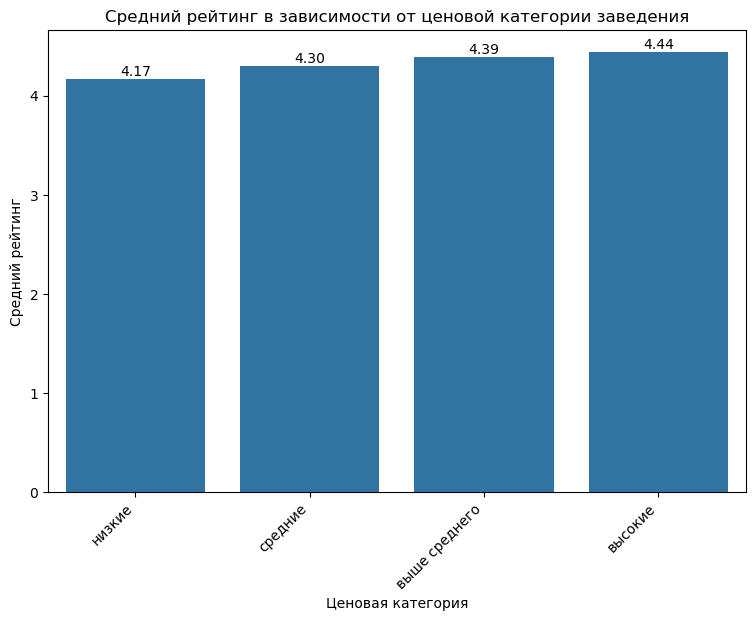

In [69]:
# Визуализируем значения среднего рейтинга для разных ценовых категорий заведений

# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(9, 6))

# Строим столбчатую диаграмму для отображения среднего рейтинга для разных ценовых категорий заведений с помощью библиотеки seaborn
ax = sns.barplot(x=price_rating.index, y=price_rating.values)

# Настраиваем оформление графика
# Ручное добавление подписей столбцов
for patch in ax.patches:
    height = patch.get_height()  # Получаем высоту столбца (значение count)
    x = patch.get_x() + patch.get_width() / 2  # Центр столбца по X
    y = patch.get_y() + height  # Верхняя граница столбца
    ax.text(x, y, 
            f'{height:.2f}', 
            ha='center',  # Горизонтальное выравнивание по центру
            va='bottom')  # Вертикальное выравнивание снизу
plt.title("Средний рейтинг в зависимости от ценовой категории заведения")
plt.xlabel("Ценовая категория")
plt.ylabel("Средний рейтинг")
plt.xticks(rotation=45, ha='right') 

# Выводим график
plt.show()

Чем выше ценовая категория - тем выше рейтинг. Слабая положительная связь присутствует.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся?

In [70]:
# Для топ-15 сетевых заведений найдем количество, средний рейтинг, категорию
network_stats = merged_df[merged_df['chain'] == 1].groupby(['name', 'category']).agg(
    num_locations=('name', 'count'),  # Количество заведений
    avg_rating=('rating', 'mean')    # Средний рейтинг
).sort_values('num_locations', ascending=False).head(15)
network_stats

,,num_locations,avg_rating
name,category,,
Шоколадница,кофейня,119,4.178151
Домино'с пицца,пиццерия,76,4.169737
Додо пицца,пиццерия,74,4.286487
One price coffee,кофейня,71,4.064789
Яндекс лавка,ресторан,69,3.872464
Cofix,кофейня,65,4.075385
Prime,ресторан,49,4.114285
Кофепорт,кофейня,42,4.147619
Кулинарная лавка братьев караваевых,кафе,39,4.394872


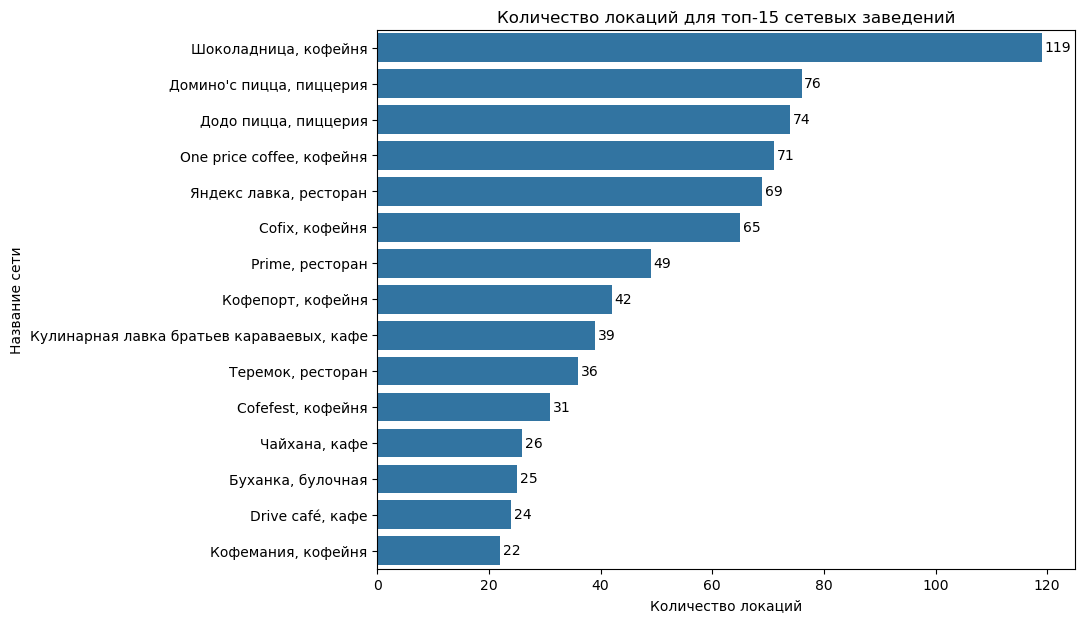

In [71]:
# Визуализируем количество точек для топ-15 сетевых заведений

t = network_stats.reset_index()
t['name_cat'] = t['name'].str.cat(t['category'], ', ') # Новый столбец для точной идентификации заведения на графике

# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(9, 7))

# Строим столбчатую диаграмму
ax = sns.barplot(data=t, x='num_locations', y='name_cat')

# Настраиваем оформление графика
for patch in ax.patches:
    width = patch.get_width()  # Получаем ширину столбца (значение count)
    y = patch.get_y() + patch.get_height() / 2  # Центрируем по высоте
    ax.text(width + 0.5, y, f'{int(width)}', va='center')  # +0.5 для отступа
plt.title("Количество локаций для топ-15 сетевых заведений")
plt.xlabel("Количество локаций")
plt.ylabel("Название сети")

# Выводим график
plt.show()

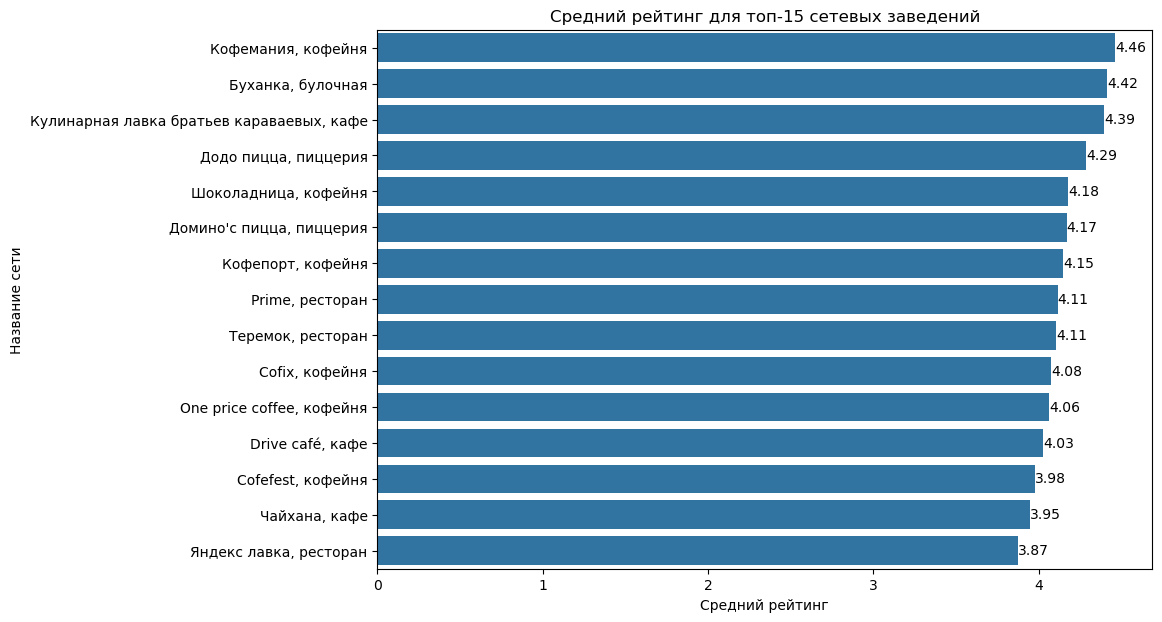

In [72]:
# Визуализируем средний рейтинг для топ-15 сетевых заведений

# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(10, 7))

# Строим столбчатую диаграмму
ax = sns.barplot(data=t.sort_values('avg_rating', ascending=False), x='avg_rating', y='name_cat')

# Настраиваем оформление графика
for patch in ax.patches:
    width = patch.get_width()  # Получаем ширину столбца (значение count)
    y = patch.get_y() + patch.get_height() / 2  # Центрируем по высоте
    ax.text(width, y, f'{width.round(2)}', va='center') 
plt.title("Средний рейтинг для топ-15 сетевых заведений")
plt.xlabel("Средний рейтинг")
plt.ylabel("Название сети")

# Выводим график
plt.show()

In [73]:
t['category'].value_counts()

category
кофейня     6
ресторан    3
кафе        3
пиццерия    2
булочная    1
Name: count, dtype: int64

**Распределение по количеству заведений (популярность сети)**

Абсолютный лидер: Шоколадница — 119 заведений — самая крупная сеть кофеен

Группа лидеров: Домино'с пицца — 76, Додо пицца — 74, One price coffee — 71 

Наименьшее распространение: кофейня Кофемания — 22 заведения

**Средний рейтинг (качество обслуживания)**

Топ-3 по рейтингу:

Кофемания (4.46) — премиальная кофейня

Буханка (4.42) — булочная

Кулинарная лавка братьев Караваевых (4.39) — премиальное кафе

Низший рейтинг: Яндекс лавка (3.87) и Чайхана (3.95)

Малые сети часто получают более высокие оценки, чем крупные игроки

**Анализ по категориям**

В рейтинге присутствуют:

Кофейни - 6 сетей

Кафе - 3 сети

Рестораны - 3 сети

Пиццерии - 2 сети

Булочная - 1 сеть

Наиболее представленная в рейтинге категория заведений — кофейни ♥

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?


In [74]:
# Изучаем статистические показатели столбца middle_avg_bill
print('Статистические показатели столбца middle_avg_bill:')
merged_df['middle_avg_bill'].describe()

Статистические показатели столбца middle_avg_bill:


count     3149.000000
mean       958.053650
std       1009.734436
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Значения среднего чека варьируются от очень маленьких (0) до крайне больших (35000) - требуется проверка на аномалии, также высокое стандартное отклонение (1009.73) указывает на сильный разброс данных вокруг среднего. Среднее значение сильно смещено вправо (750 < 958) из-за выбросов => распределение скошено вправо (положительная асимметрия)

Построим гистограмму распределения значений и диаграмму размаха для столбца со средним чеком

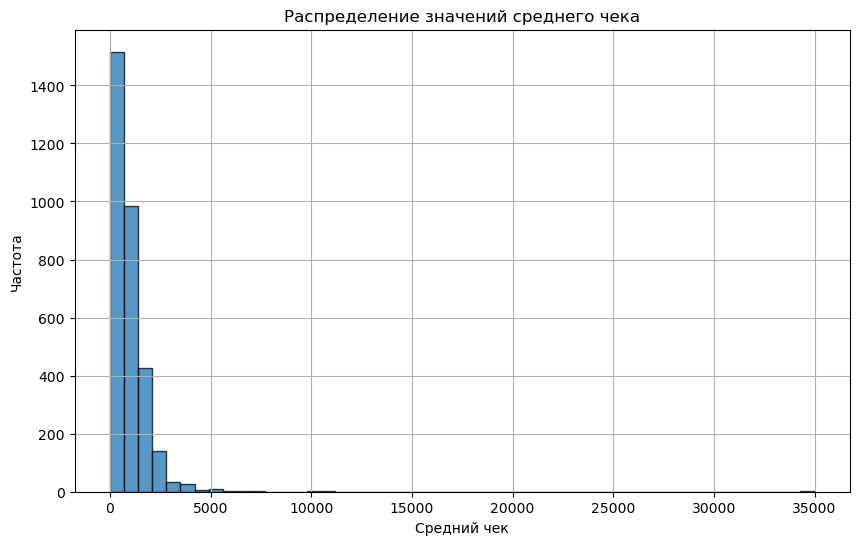

In [75]:
# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(10, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
merged_df['middle_avg_bill'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин - всего 50
                alpha=0.75,
                edgecolor='black',
                rot=0 # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

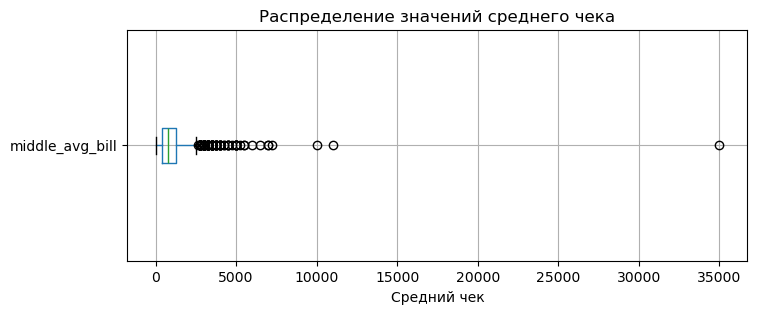

In [76]:
# Создаем контейнер графика matplotlib и задаем его размер
plt.figure(figsize=(8, 3))

# Строим диаграмму размаха значений в столбце middle_avg_bill
merged_df.boxplot(column='middle_avg_bill', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')

# Выводим график
plt.show()

Большинство клиентов имеют средний чек от 375 до 1250, но редкие крупные заказы искажают общую картину.

In [77]:
# Выведем статистические данные по среднему чеку заведения для каждого района Москвы
for dist in merged_df['district'].unique():
    print(f'Статистики middle_avg_bill - {dist}')
    print(merged_df[merged_df['district'] == dist]['middle_avg_bill'].describe())

Статистики middle_avg_bill - Северный административный округ
count      322.000000
mean       927.959656
std        912.608765
min        130.000000
25%        350.000000
50%        650.000000
75%       1250.000000
max      11000.000000
Name: middle_avg_bill, dtype: float64
Статистики middle_avg_bill - Северо-Восточный административный округ
count     301.000000
mean      716.611267
std       591.232117
min        50.000000
25%       325.000000
50%       500.000000
75%       950.000000
max      4500.000000
Name: middle_avg_bill, dtype: float64
Статистики middle_avg_bill - Северо-Западный административный округ
count     157.000000
mean      822.222900
std       595.055176
min       120.000000
25%       340.000000
50%       700.000000
75%      1100.000000
max      2900.000000
Name: middle_avg_bill, dtype: float64
Статистики middle_avg_bill - Западный административный округ
count     306.000000
mean     1053.225464
std       779.008423
min        50.000000
25%       427.500000
50%      1

Такие данные лучше посмотреть на визуализации

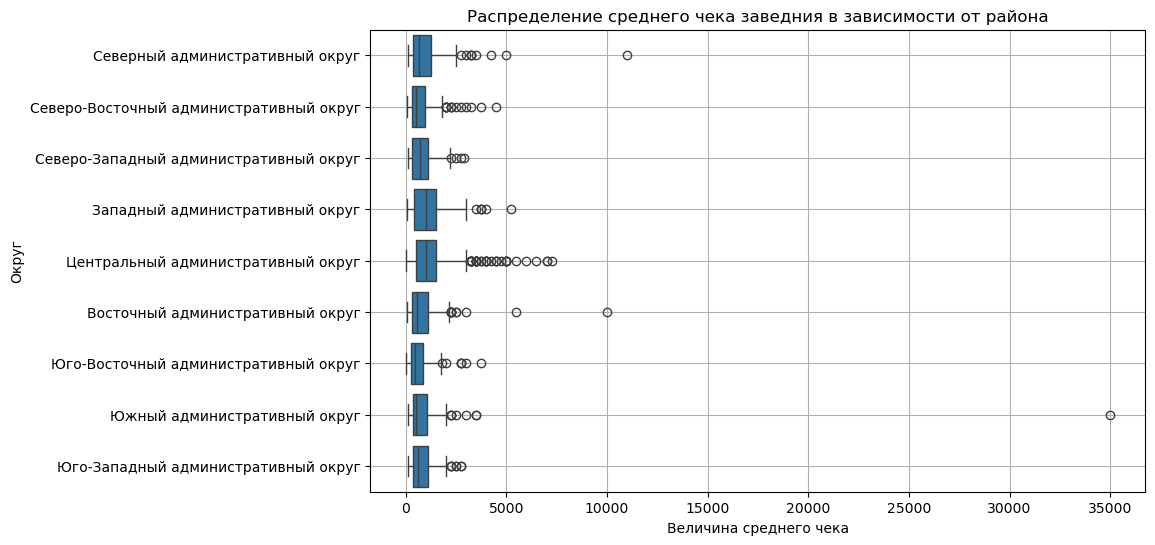

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, y='district', x='middle_avg_bill')
plt.title("Распределение среднего чека заведния в зависимости от района")
plt.xlabel('Величина среднего чека')
plt.ylabel('Округ')
plt.grid()
plt.show()

Для Южного округа сразу отмечаем тот самый выброс 35000. Возможно, в каком-то заведении проходило дорогое мероприятие, это неплохо было бы проверить, чтобы избежать искажения данных.
Для всех округов в целом характерны выбросы в данных, это также можно было заметить по разнице между средним и медианой из таблиц выше.

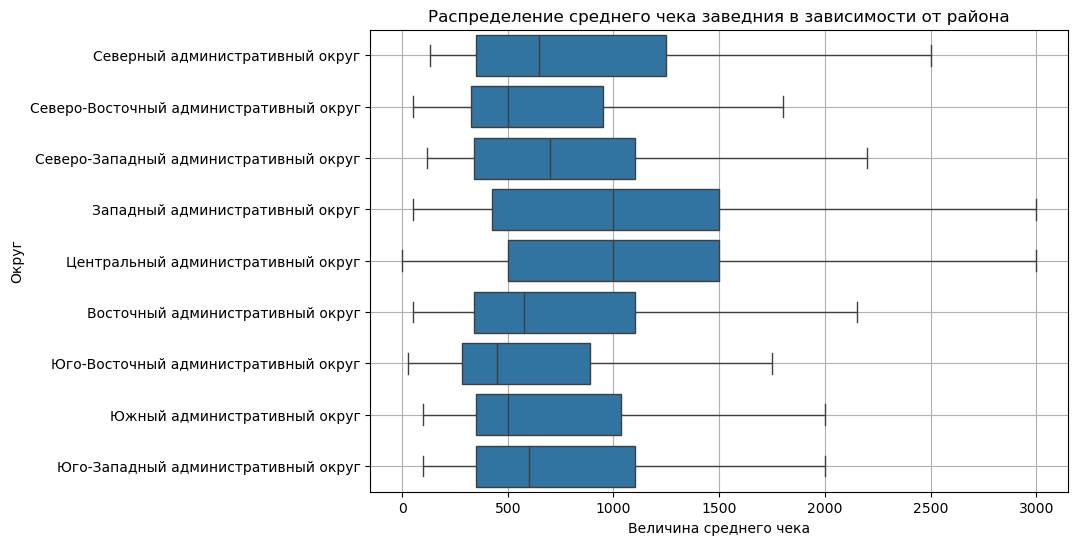

In [79]:
# Уберем с графика выбросы, чтобы сравнить центральные тенденции между группами 
plt.figure(figsize=(9, 6))
sns.boxplot(data=merged_df, y='district', x='middle_avg_bill', showfliers=False)
plt.title("Распределение среднего чека заведния в зависимости от района")
plt.xlabel('Величина среднего чека')
plt.ylabel('Округ')
plt.grid()
plt.show()

In [80]:
merged_df.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False)

district
Западный административный округ            1000.0
Центральный административный округ         1000.0
Северо-Западный административный округ      700.0
Северный административный округ             650.0
Юго-Западный административный округ         600.0
Восточный административный округ            575.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Юго-Восточный административный округ        450.0
Name: middle_avg_bill, dtype: float32

**Среднее значение (mean):**

Центральный округ лидирует с самым высоким средним чеком (1191 руб.), что ожидаемо, так как это исторический и деловой центр города.

Далее следуют Западный (1053 руб.) и Северный (928 руб.) округа.

Самые низкие средние чеки в Юго-Восточном (654 руб.) и Северо-Восточном (717 руб.) округах.

**Разброс данных (std):**

Наибольший разброс наблюдается в Южном округе (2009 руб.), что связано с наличием выбросов (максимальный чек 35 000 руб.).

Также высокий разброс в Центральном (920 руб.) и Северном (913 руб.) округах (также присутствуют выбросы данных).

Наиболее стабильные показатели у Юго-Западного (559 руб.) и Юго-Восточного (567 руб.) округов.

**Медиана (50%):**

Центральный и Западный округа имеют медиану 1000 руб., что говорит о самом высоком среднем чеке.

Самая низкая медиана в Юго-Восточном округе (450 руб.).

**Максимальные значения (max):**

Рекордный чек зафиксирован в Южном округе (35000 руб.), что сильно влияет на его статистику.

Высокие максимумы также в Северном (11000 руб.) и Восточном (10000) округах.

**Минимальные значения (min):**

Минимальные чеки примерно одинаковы во всех округах (30-130 руб.), за исключением Центрального, где есть чек с нулевой стоимостью (возможно, акция или ошибка данных).

**Выводы:**

Центральный и Западный округа являются самыми дорогими по среднему чеку.

Юго-Восточный, Южный и Северо-Восточный округа наиболее бюджетные.

Южный округ выделяется аномально высокими чеками, что может быть связано с наличием премиальных/банкетных заведений.

---

### Промежуточный вывод


**Категории заведений**

*Кафе* — самая распространенная категория в Москве, за ними следуют *рестораны* и *кофейни*.

*Булочные* — наименее представлены (возможно, из-за конкуренции с пекарнями при кафе).

**Распределение по округам**

*Центральный административный округ (ЦАО)* — лидер по количеству заведений.

*Северо-Западный округ (СЗАО)* — меньше всего заведений.

В ЦАО преобладают *рестораны*, *кафе* и *кофейни*, что соответствует общему распределению по городу.

**Сетевые vs. несетевые заведения**

62% заведений — *несетевые*, 38% — *сетевые*.

Булочные чаще сетевые (61%), тогда как бары, рестораны, кафе, фастфуд и столовые — преимущественно независимые.

Кофейни и пиццерии — примерно 50/50.

**Количество посадочных мест** 

Для *ресторанов* характерно самое большое число посадочных мест. Самое маленькое - для *булочных*. 

Большая часть заведений имеет относительно небольшое количество мест (*до 140*). Есть редкие выбросы с очень большим числом мест (до 1288), но они не аномальны, вероятно.

**Рейтинги заведений**

Средний рейтинг высокий (4.23 из 5).

*Бары* и *пабы* имеют наивысший рейтинг (4.39), *фастфуд* — самый низкий (4.05).

Чем выше ценовая категория, тем выше рейтинг (слабая положительная корреляция).

**Топ-15 сетей Москвы**

*Шоколадница* (119 точек) — крупнейшая сеть (кофейни).

*Домино'с* и *Додо Пицца* — лидеры среди пиццерий.

*Кофемания* (кофейня) и *Буханка* (булочная) — лучшие по рейтингу (4.4+).

*Яндекс Лавка* (3.87) и *Чайхана* (3.95) — низшие рейтинги.

**Средний чек по округам**

*ЦАО* и *ЗАО* — самые дорогие (медиана 1000 руб.).

*Юго-Восточный округ* — самый доступный (медиана 450 руб.).

Чем ближе к центру, тем выше цены.

## 4. Итоговый вывод и рекомендации


---
**Обзор проделанной работы**

В ходе исследования был проведен комплексный анализ рынка общественного питания Москвы на основе данных Яндекс Карт и Яндекс Бизнеса (лето 2022 года). 

Основные этапы работы:
- Загрузка и предобработка данных (оптимизация типов, обработка пропусков, удаление дубликатов)
- Исследование распределения заведений по категориям, округам, сетевым признакам
- Анализ посадочных мест, рейтингов и ценовых категорий
- Изучение корреляций между рейтингом и другими параметрами
- Определение топ-15 сетевых заведений и их характеристик
- Анализ среднего чека в зависимости от района
---
**Главные выводы и результаты исследовательского анализа**

*Категории заведений*

- Кафе, рестораны и кофейни — самая распространенные категории
- Булочные — наименее представлены

*Распределение по округам*

- Центральный округ (ЦАО) — лидер по количеству заведений (более 20% от общего числа), преобладают рестораны, кафе и кофейни
- Северо-Западный округ (СЗАО) — наименьшее число заведений

*Сетевые vs. несетевые заведения*

- 62% заведений — несетевые, 38% — сетевые
- Булочные чаще сетевые
- Бары, рестораны, кафе, фастфуд и столовые — не сетевые
- Кофейни и пиццерии — примерно 50/50

*Количество посадочных мест*

- Рестораны — самые вместительные (медиана 86 мест)
- Булочные — самые маленькие (медиана 50 мест)
- Большинство заведений имеют до 140 мест, но есть редкие выбросы (до 1288 мест).

*Рейтинги заведений*

- Средний рейтинг высокий (4.23 из 5)
- Бары и пабы — наивысший рейтинг (4.39)
- Фастфуд — самый низкий (4.05)
- Чем выше ценовая категория, тем выше рейтинг (слабая положительная корреляция)

*Топ-15 сетевых заведений*

- Шоколадница (119 точек) — крупнейшая сеть (кофейни)
- Домино'с и Додо Пицца — лидеры среди пиццерий
- Кофемания (кофейня) и Буханка (булочная) — лучшие по рейтингу (4.4+)
- Яндекс Лавка (3.87) и Чайхана (3.95) — низшие рейтинги

*Средний чек по округам*

- ЦАО и ЗАО — самые дорогие (медиана 1000 руб.)
- Юго-Восточный округ — самый доступный (медиана 450 руб.)
- Чем ближе к центру, тем выше цены

---

**Рекомендации для инвестиционного фонда**

1. *Выбор категории заведения*
- Кафе и кофейни — наиболее востребованные, но высокая конкуренция
- Булочные — мало представлены, и в основном сетевые (можно рассмотреть франшизу)
- Рестораны и бары — высокий рейтинг, но требуют больше инвестиций

2. *Локация*
- Центральный округ (ЦАО) — высокая проходимость, но дорогая аренда и конкуренция
- Северо-Западный округ (СЗАО) — мало заведений, можно занять нишу

3. *Формат заведения*
- Сетевые кофейни и пиццерии (например, по модели Шоколадницы или Додо Пиццы) — проверенные бизнес-модели
- Булочные и пекарни — мало конкурентов, можно сделать акцент на премиальность
- Фуд-корты и столовые — недорогой сегмент, но стабильный спрос

4. *Ценовая политика*
- В ЦАО и ЗАО — премиальный сегмент (средний чек от 1000 руб.)
- В окраинных округах — демократичные цены (до 500 руб.)

5. *Дополнительные факторы*
- Круглосуточные заведения — востребованы в центре и около транспортных узлов
- Рейтинг и отзывы — критически важны для привлечения клиентов

---
***Заключение***

Наиболее перспективные направления для инвестиций:

✅ Сетевые кофейни и пиццерии в ЦАО или ЗАО (высокий спрос, проверенные модели)

✅ Булочные и пекарни в менее насыщенных округах (СЗАО)

✅ Рестораны среднего и высокого ценового сегмента в центре (высокий рейтинг, платежеспособная аудитория)

Рекомендуется также провести дополнительное исследование локального спроса и арендных ставок в выбранных районах.